In [1]:
% run ../NN/scripts/Functions.ipynb

/nfs/scistore08/kondrgrp/eputints/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [23]:
df = pd.read_excel('SignEpiPairs.xlsx')
df=df[df.pBon<0.05]

### 1. Adjacency

In [24]:
def make_graph(n):
    graph = df[df.SegN==n]
    graph = graph.reset_index(drop=True)
    H = nx.Graph()

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].iloc[i]) + str(graph['Perm'].iloc[i])
        node2 = str(graph['SubPos'].iloc[i]) + str(graph['SubPerm'].iloc[i]) 
        if node1 not in H.nodes():
            H.add_node(node1)
        if node2 not in H.nodes():
            H.add_node(node2)
        H.add_edge(node1, node2, {'color':'gray','thickness':2})
    
    return H

In [25]:
def make_adj_table(H,n):
    nodes = []
    for node in H.node:
        nodes.append(node)

    adj_table = pd.DataFrame(index=nodes,columns=['Adjacency'])

    for node in H.node:    
        adj_table.loc[node]['Adjacency']=[nodes.index(x) for x in H.neighbors(node)]

    adj_table.to_csv('adj/S'+str(n)+'.tsv','\t')

In [26]:
for n in range(1,13):
    H=make_graph(n)
    if len(H.node) > 0:
        make_adj_table(H,n)
    

In [27]:
!ls adj/

S11.tsv  S1.tsv  S3.tsv  S5.tsv  S8.tsv
S12.tsv  S2.tsv  S4.tsv  S6.tsv  S9.tsv


### 2. Graphs visualization

In [3]:
%run '../NN/scripts/Functions.ipynb'
import networkx as nx

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [13]:
df = pd.read_excel('SignEpiPairs.xlsx')
df = df[df.pBon<0.05]

for chunk in ['S9']:
    print chunk
    
    graph = df[df.SegN==int(chunk[1:])]
    graph = graph.reset_index(drop=True)
    nodes = {}

    for i in set(graph['VarPos']):
        nodes[i] = []
    for i in set(graph['SubPos']):
        nodes[i] = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        if node1 not in nodes[graph['VarPos'].ix[i]]:
            nodes[graph['VarPos'].ix[i]].append(node1)
        if node2 not in nodes[graph['SubPos'].ix[i]]:
            nodes[graph['SubPos'].ix[i]].append(node2)
            
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}
    edges = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        edges.append([node1, node2])


    for key in nodes:
        for node in nodes[key]:
            H.add_node(node)
            H.size[node]=10000
            H.color[node]='gray'

    edges = sorted(edges)

    for edge in edges:
        if [edge[1],edge[0]] in edges:
            H.add_edge(edge[0], edge[1], {'color':'#00AEEF', 'thickness':5})
        else:
            H.add_edge(edge[0], edge[1], {'color':'gray', 'thickness':2})

    color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
    thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]
    
    nodeList = [x for x in H.nodes()]
    
    nodesDF = pd.DataFrame(columns = ['id','label'])
    nodesDF['id']=nodeList
    nodesDF['label']=nodeList
    nodesDF['position']=[int(x[:-2]) for x in nodeList]
    nodesDF.sort(['position'],inplace=True)
    nodesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/dimensions/data/s' + str(chunk[1:]) + 'Nodes.csv')
    
    edgesDF = pd.DataFrame(columns=['source','target'], index=[x for x in range(len(edges))])
    
    edgeGroups = []
    for edge in edges:
        if [edge[1],edge[0]] in edges:
            edgeGroups.append(1)
        else:
            edgeGroups.append(0)
            
    edgesDF['source']=[x[0] for x in edges]
    edgesDF['target']=[x[1] for x in edges]
    edgesDF['group']=edgeGroups

    edgesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/dimensions/data/s' + str(chunk[1:]) + 'Edges.csv')

S9


/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:59: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [14]:
plt.figure(figsize=[40,40])
nx.draw_circular(H, with_labels=True,
                 node_size=20000, alpha=0.5, 
                 font_size=50)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


***

# TESTING

In [31]:
H = nx.Graph()

In [32]:
nodes=['A10','A01','B10','B01','C10','C01','D01','D10']

for node in nodes:
    H.add_node(node)
    
for node1 in nodes:
    for node2 in nodes:
        H.add_edge(node1, node2, {'color':'gray','thickness':2})
        

In [33]:
max(nx.greedy_color(H).values())+1

8

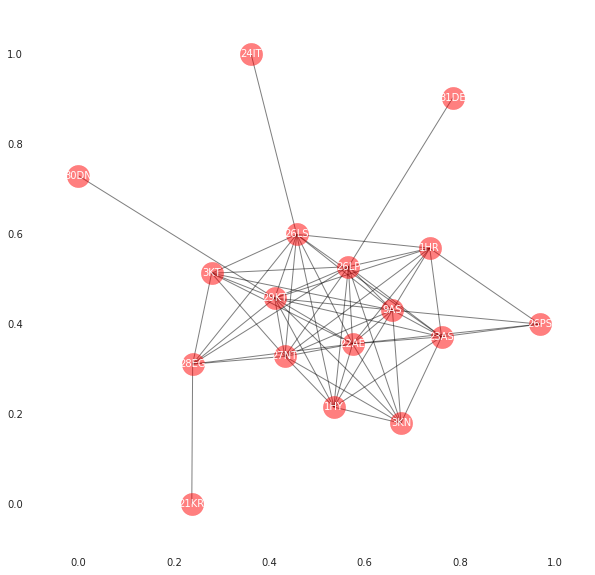

In [32]:
plt.figure(figsize=[10,10])
nx.draw_networkx(H, with_labels=True,
                 node_size=500, alpha=0.5,
                 font_size=10, font_color='white')
nx.write_gml(H, 'network.gml')

In [35]:
list(H.neighbors)

TypeError: 'instancemethod' object is not iterable